In [13]:
import numpy as np
import pylab as plt
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 150

# Дискретные сигналы

Сигналом обычно называют то, что несет в себе какие-то данные. По большей
части сигналы передают информацию о состоянии или поведении физической
системы. На математическом языке сигналы — это функции одной или более независимых переменных. По общему соглашению независимой переменной в математическом представлении сигнала
выступает время, хотя в отдельных примерах независимая переменная в сигнале
фактически временем не является.

Независимая переменная в математической реализации сигнала может быть
как непрерывной, так и дискретной. 

## Аналоговые сигналы
Сигналы с непрерывным временем определяются на непрерывных промежутках, зависят от непрерывной переменной и
обычно называются аналоговыми. 

$x_a = x_a(t), t\in\rm I\!R$


## Дискретные сигналы
Сигналы с дискретным временем, или просто
дискретные сигналы, определены в дискретные моменты времени и, как следствие, имеют независимую переменную с дискретными значениями. Тем самым
они отождествляются с числовыми последовательностями. 

$x = \{x[n]\},\ -\infty < n < \infty $, $n \in Z$

Далее дискретные сигналы будут обозначаться как $x[n]$


## Примеры
### Случайный сигнал


Text(0, 0.5, 'x[n]')

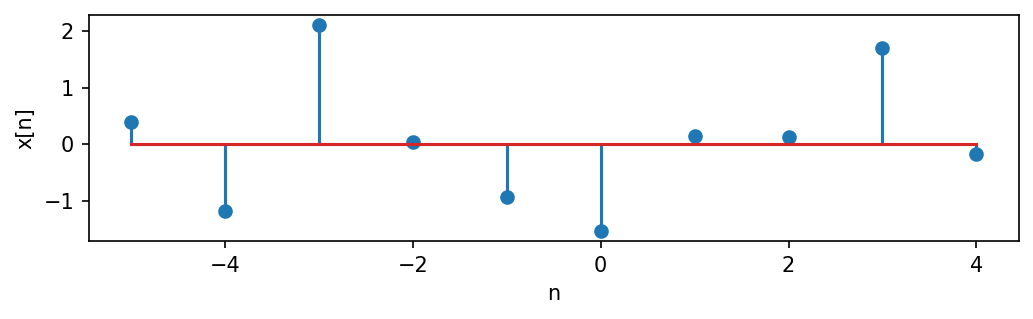

In [3]:
n = np.arange(-5, 5)
x1 = np.random.normal(size=10)

plt.stem(n, x1, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')

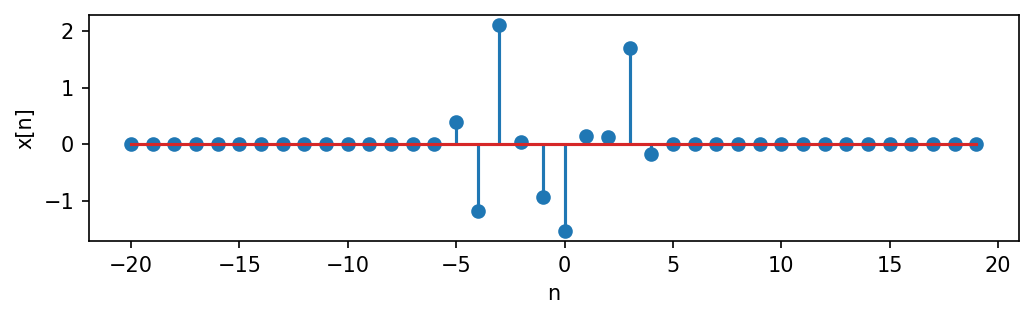

In [5]:
n = np.arange(-20, 20)
x = np.zeros(len(n))
x[(n>=-5) & (n<5)] = x1

plt.stem(n, x, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
pass

### Звуковой сигнал

(0, 30516)

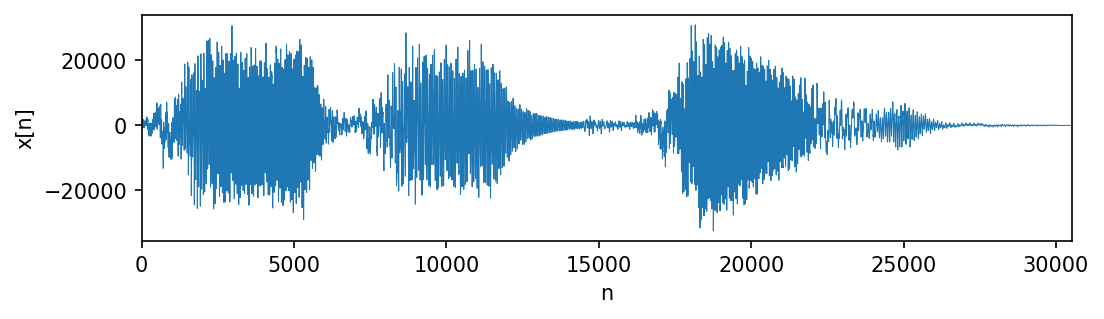

In [6]:
from scipy.io.wavfile import read, write

fs, x = read('../data/cw_flute_shot091.wav')
n = np.arange(len(x))
x = x[:, 0] # запись правого канала

plt.plot(n, x, linewidth=0.5)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.xlim(0, len(x))

In [8]:
import sounddevice as sd
sd.play(x, fs)

(0, 30516)

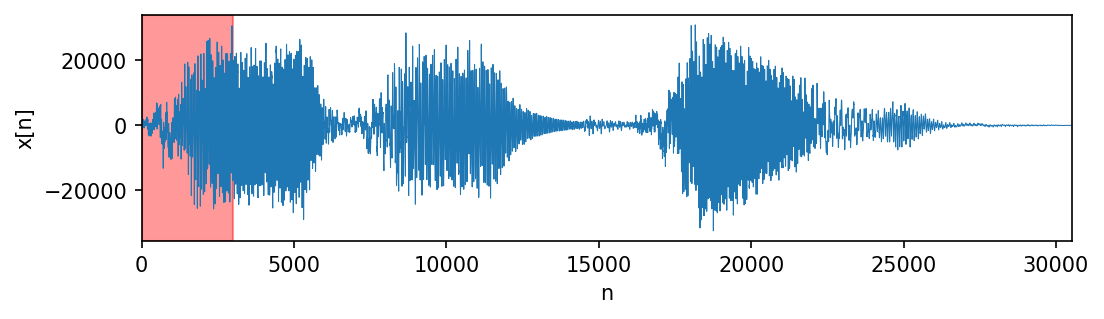

In [9]:
plt.plot(n, x, linewidth=0.5)
plt.xlabel('n')
plt.ylabel('x[n]')

n2 = 3000
plt.axvspan(0, n2, color='r', alpha=0.4)
plt.xlim(0, len(x))

In [22]:
sd.play(x[n < n2], fs)

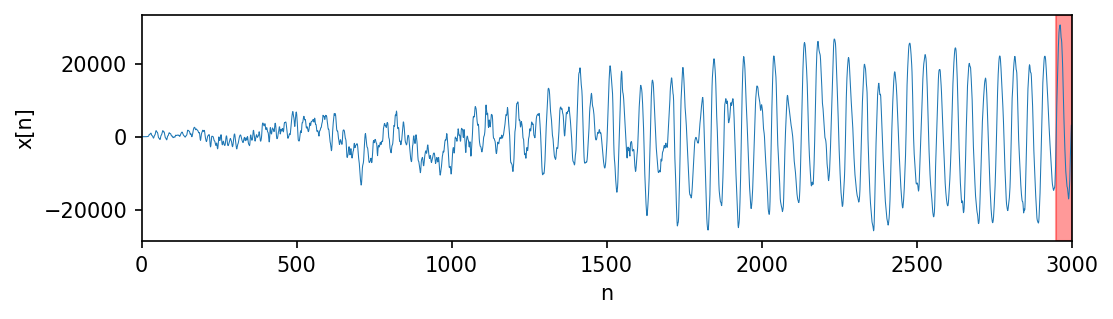

In [11]:
plt.plot(n[n < n2], x[n < n2], linewidth=0.5)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.xlim(0, n2)

n1 = 2950
plt.axvspan(n1, n2, color='r', alpha=0.4)

Text(0, 0.5, 'x[n]')

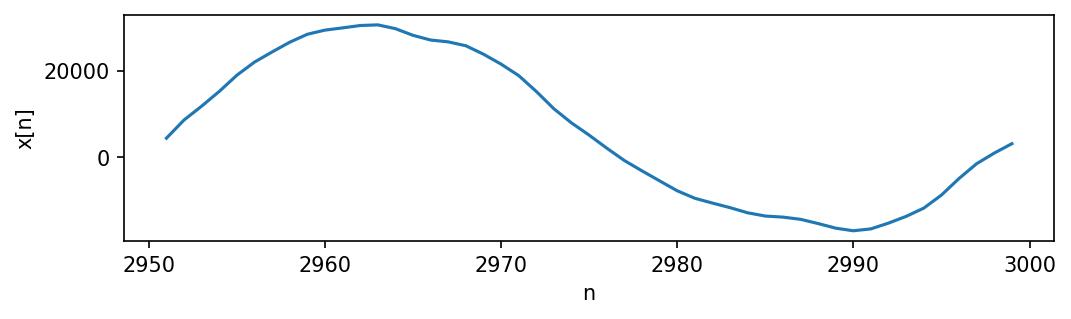

In [12]:
slc = (n>n1) & (n<n2)
x_slice = x[slc]
n_slice = n[slc]

plt.plot(n_slice, x_slice)
plt.xlabel('n')
plt.ylabel('x[n]')

Text(0, 0.5, 'x[n]')

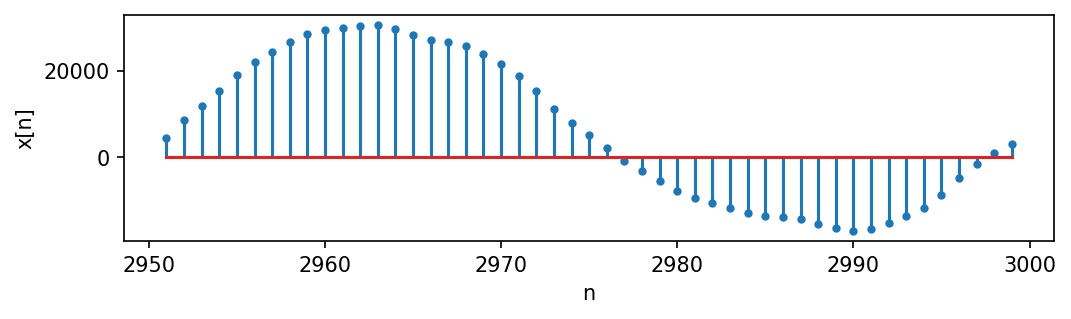

In [14]:
plt.stem(n_slice, x_slice, use_line_collection=True)[0].set_markersize(3)
plt.xlabel('n')
plt.ylabel('x[n]')

## Связь дискретных и аналоговых сигналов
На практике такие последовательности возникают, например, при преобразовании аналогового сигнала в дискретную форму. 

$x[n] = x_a(nT)$

$T$ - период(шаг) дискретезации

$f_s = 1/T$ - частота дискретезации

In [15]:
print('Fs = {} Hz\nT = {:.3f} * 10^-6 s'.format(fs, 1/fs*1e6))
# sd.play(x, fs)
# sd.play(x, fs//2)

Fs = 44100 Hz
T = 22.676 * 10^-6 s


(0, 0.6919727891156463)

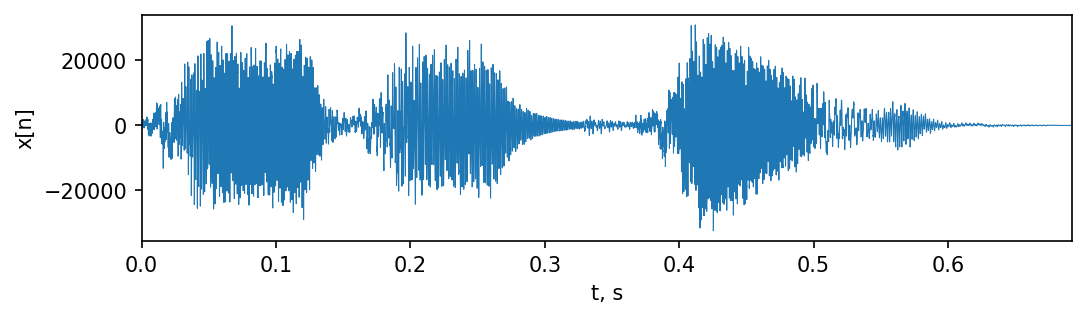

In [16]:
t = n/fs

plt.plot(t, x, linewidth=0.5)
plt.xlabel('t, s')
plt.ylabel('x[n]')
plt.xlim(0, len(x)/fs)

Text(0, 0.5, 'x[n]')

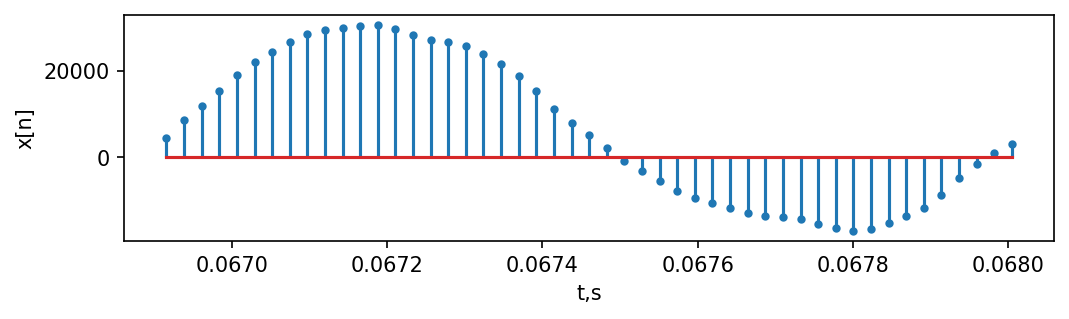

In [17]:
plt.stem(n_slice/fs, x_slice, use_line_collection=True)[0].set_markersize(3)
plt.xlabel('t,s')
plt.ylabel('x[n]')

In [19]:
t1 =  n_slice[-1]/fs - n_slice[0]/fs
f1 = 1/t1
print('Период ~= {:.4f}s'.format(t1))
print('Частота ~= {:.3f}Hz'.format(f1))

Период ~= 0.0011s
Частота ~= 918.750Hz


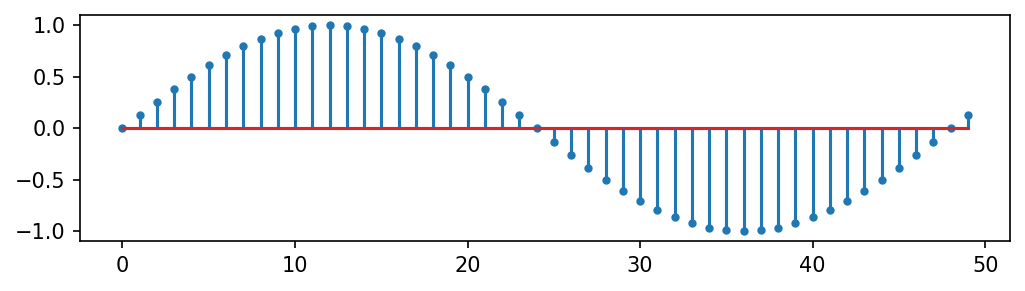

In [20]:
x_sim = np.sin(2*np.pi*f1*np.arange(n2-n1)/fs)
plt.stem(x_sim, use_line_collection=True)[0].set_markersize(3)

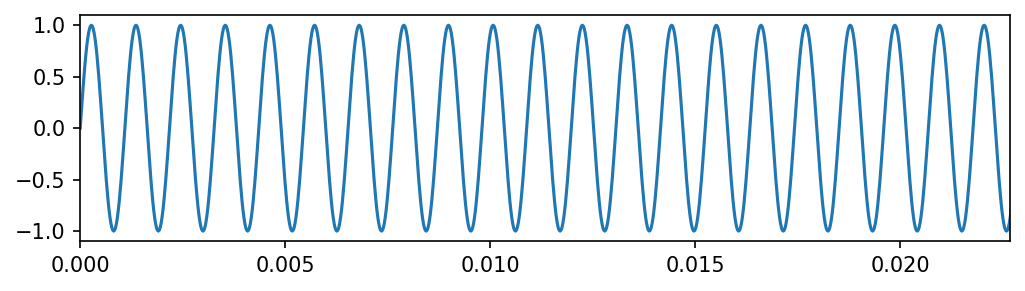

In [21]:
t = n/fs
x_sim = np.sin(2*np.pi*f1*t)

plt.plot(t, x_sim)
plt.xlim(0, 1000/fs)
sd.play(x_sim, fs)


C:\Software\miniconda\envs\psychopy\lib\site-packages\scipy\signal\spectral.py:1969: UserWarning: nperseg = 44100 is greater than input length  = 30516, using nperseg = 30516
  .format(nperseg, input_length))


(0, 1300)

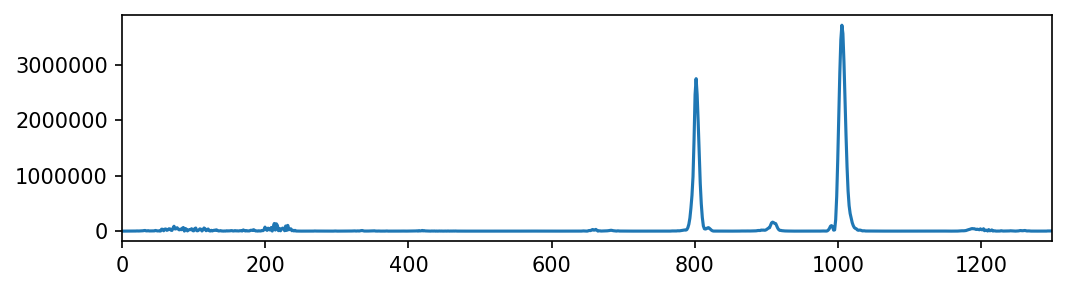

In [24]:
from scipy.signal import welch
plt.plot(*welch(x, fs, nperseg=fs))
plt.xlim(0, 1300)

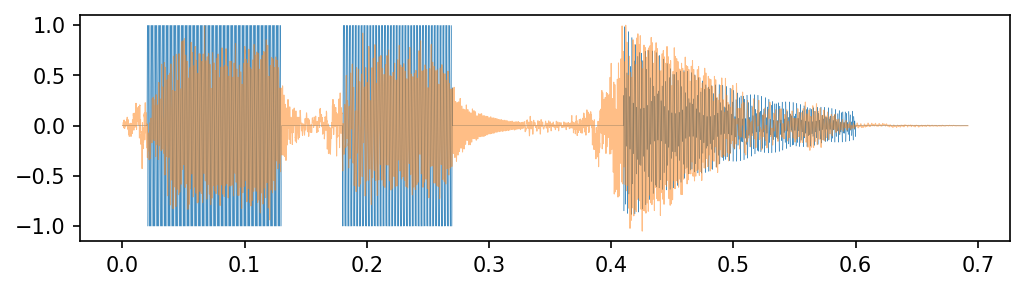

In [27]:
x_sim2 = np.zeros(len(x))*0
x_sim2[(t>0.02) & (t<0.13)] = np.sin(2*np.pi*900*t[(t>0.02) &(t<0.13)])
x_sim2[(t>0.18) & (t<0.27)] = np.sin(2*np.pi*804*t[(t>0.18) & (t<0.27)])
x_sim2[(t>0.41) & (t<0.6)] = (np.sin(2*np.pi*1008*t[(t>0.41) & (t<0.6)])*0.6 
                              + np.sin(2*np.pi*660*t[(t>0.41) & (t<0.6)])*0.4)
x_sim2[(t>0.41) & (t<0.6)] *= 0.41**5/t[(t>0.41) & (t<0.6)]**5


plt.plot(t, x_sim2, linewidth=0.2)
plt.plot(t, x/max(x), alpha=0.5, linewidth=0.5)

sd.play(x_sim2, fs)

In [31]:
sd.play(x, fs)
# sd.play(x[::-1], fs)

In [32]:
x1 = np.concatenate([x[(t>0.04) & (t<0.1)]]*4+[x[(t>0.4) & (t<0.46)]]*4+[x[(t>0.24) & (t<0.3)]]*8)
x2 = np.concatenate([x[(t>0.08) & (t<0.14)]]*4+[x[(t>0.45) & (t<0.51)]]*4+[x[(t>0.22) & (t<0.34)][::2]]*8)
sd.play(np.concatenate([x1, x2]), fs//4)

## Базовые сигналы
### Еденичный испульс  (unit sample)
$\delta[n] = \begin{cases}
0, n\ne0,\\
1, n=0\\
\end{cases}$

Text(0, 0.5, 'x[n]')

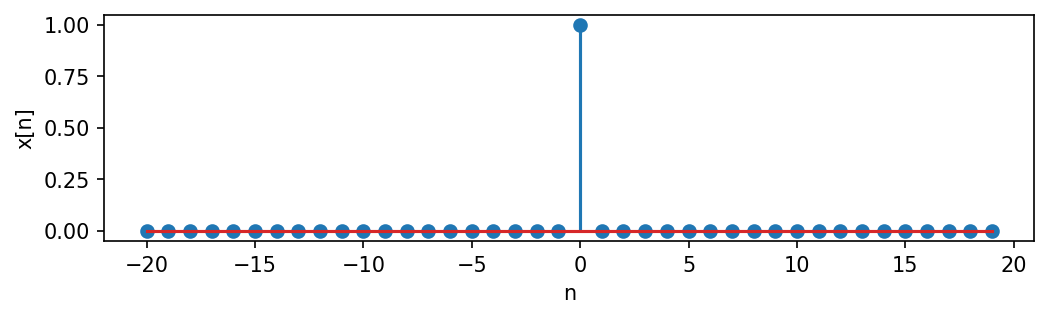

In [33]:
n = np.arange(-20, 20)
delta_n = (n==0).astype(int)

plt.stem(n, delta_n, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')
#sd.play(delta_n, fs)

Операция сдвига:

$\delta[n-k] = \begin{cases} 0, n-k\ne0,\\ 1, n-k=0\\ \end{cases} = 
\begin{cases} 0, n\ne k,\\ 1, n=k\\ \end{cases}$

<StemContainer object of 3 artists>

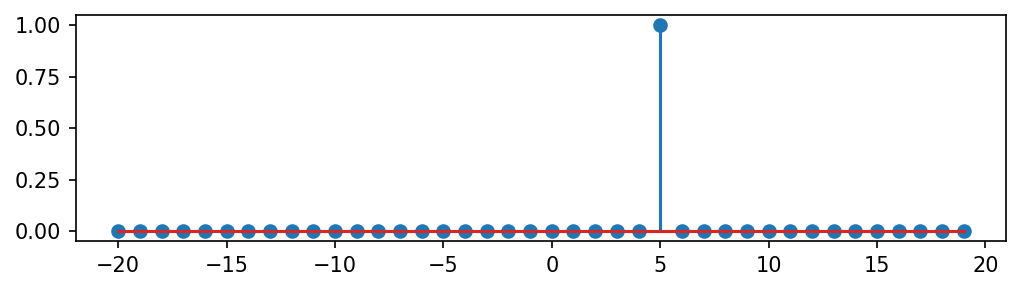

In [34]:
def delta_n_minus_k(k):
    return (n==k).astype(int)

plt.stem(n, delta_n_minus_k(5), use_line_collection=True)

Любую последовательность можно представить в виде суммы взвешенных еденичных импульсов:

$x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k]$

<StemContainer object of 3 artists>

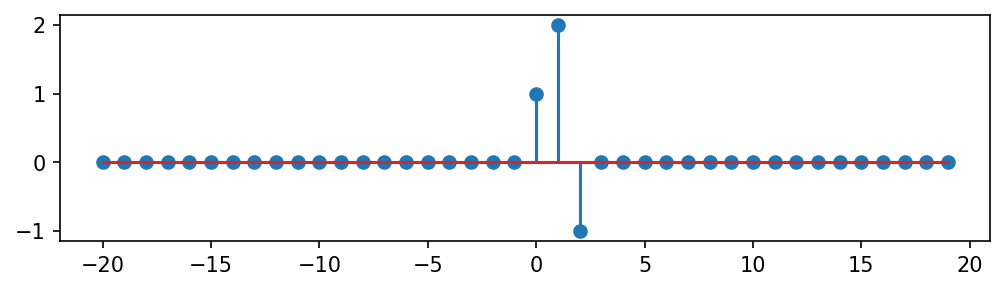

In [36]:
x_n = np.zeros(len(n))
x_n[(n>=0) & (n<3)] = [1, 2, -1]


plt.stem(n, x_n, use_line_collection=True)

<StemContainer object of 3 artists>

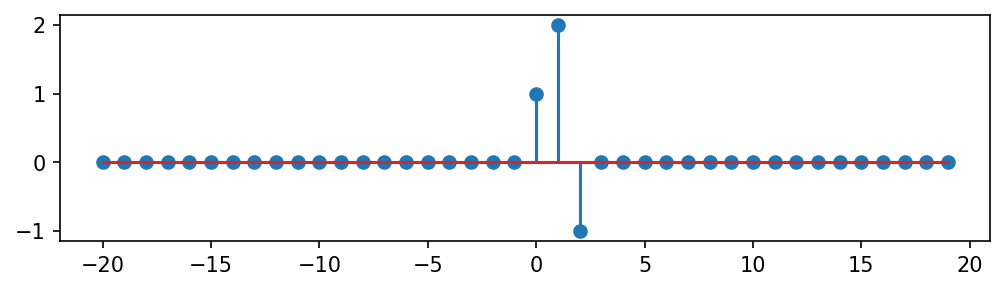

In [37]:
x2_n = np.array([x_n[n==k]*delta_n_minus_k(k) for k in n]).sum(0)


plt.stem(n, x2_n, use_line_collection=True)

### Еденичный скачок (unit step)

$u[n] = \begin{cases}
1, n\ge0,\\
0, n<0\\
\end{cases}$

Связь с еденичным испульсом:

$u[n] = \sum_{k=-\infty}^\infty u[k]\delta[n-k] = \sum_{k=0}^\infty \delta[n-k]$

Представление еденичного испульса через еденичные скачки:

$\delta[n] = u[n] - u[n-1]$

In [39]:
u_n = (n>=0).astype(int)
u_nm1 = (n-1>=0).astype(int)

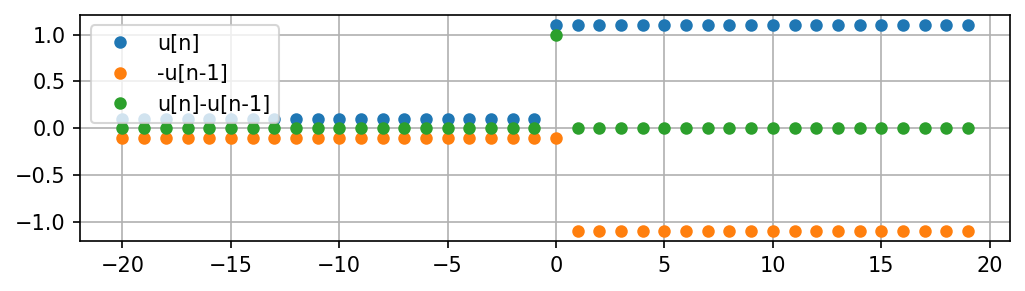

In [40]:
plt.plot(n, u_n+0.1, 'o', label='u[n]', markersize=5)
plt.plot(n, -u_nm1-0.1, 'o', label='-u[n-1]', markersize=5)
plt.plot(n, u_n-u_nm1, 'o', label='u[n]-u[n-1]', markersize=5)
plt.grid()
plt.legend(loc='upper left')

### Экспоненциальная последовательность

$x[n] = A\alpha^n$

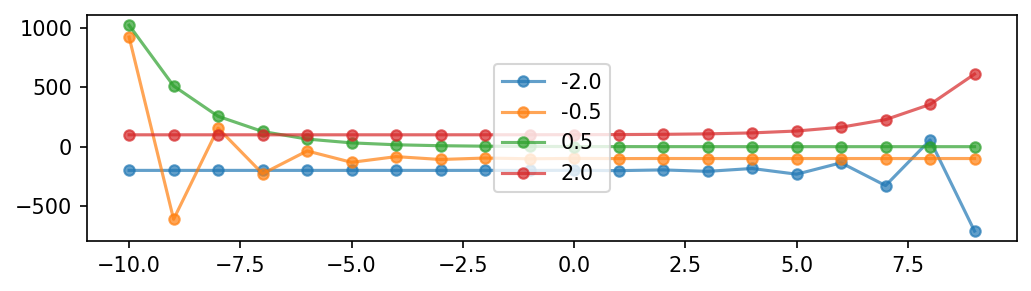

In [41]:
n = np.arange(-10, 10)
def exp_seq(alpha, A=1):
    return A*(alpha**n)




for j, alpha in enumerate([-2., -0.5, 0.5, 2.]):
    plt.plot(n, exp_seq(alpha)+j*100-200, 'o-',label=str(alpha), alpha=0.7, markersize=5)
    
plt.legend(loc=10)

$x[n] = A\alpha^n$

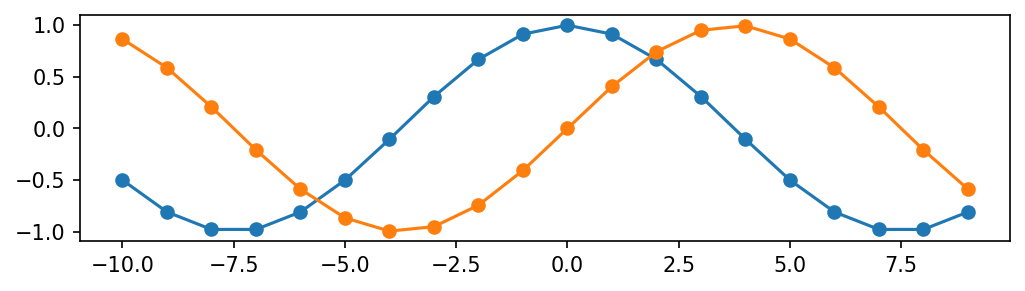

In [42]:
alpha = np.exp(2j*np.pi/15)

plt.plot(n, exp_seq(alpha).real, 'o-')
plt.plot(n, exp_seq(alpha).imag, 'o-')

$x[n] = A\alpha^n = (e^{j2\pi/15})^n = e^{j2\pi n/15} = cos(2\pi n/15)+j\cdot sin(2\pi n/15)$

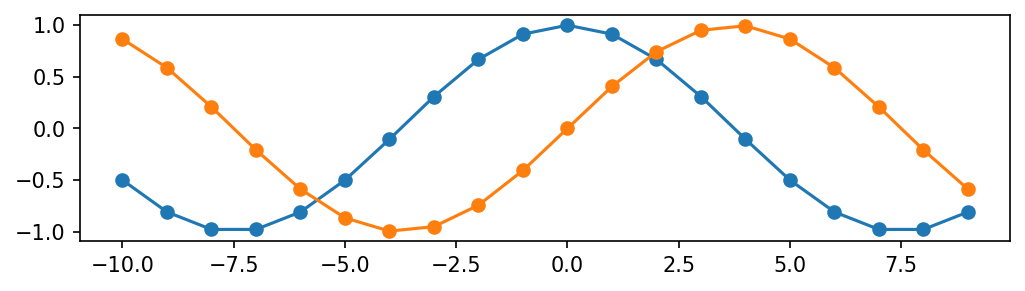

In [43]:
alpha = np.exp(2j*np.pi/15 + 4j*np.pi)


plt.plot(n, exp_seq(alpha).real, 'o-')
plt.plot(n, exp_seq(alpha).imag, 'o-')

### Синусоидальный сигнал

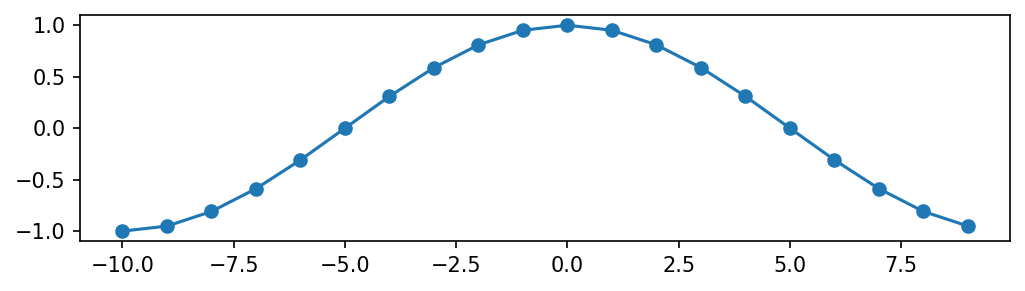

In [45]:
w_0 = 2*np.pi/20

plt.plot(n, np.cos(w_0*n), 'o-')

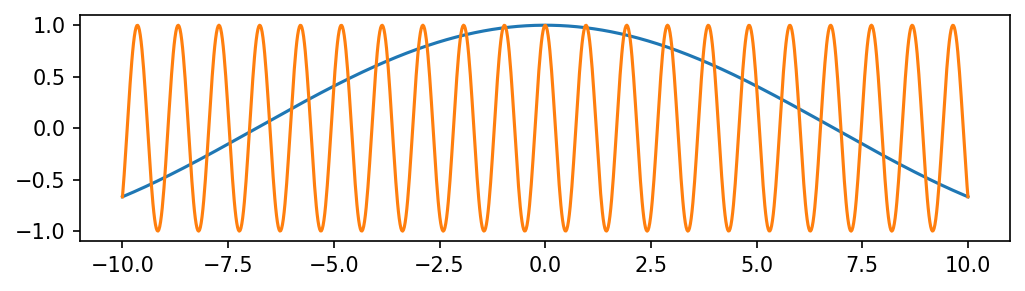

In [46]:
w_0 = 0.23
w_1 = w_0 + 2*np.pi

t = np.linspace(-10, 10, 1000)

plt.plot(t, np.cos(w_0*t), '-')
plt.plot(t, np.cos(w_1*t), '-')

#plt.xlim(-5, 5)

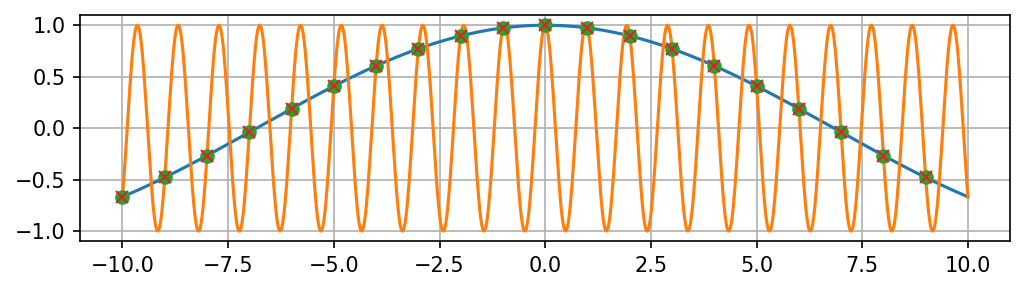

In [47]:
plt.plot(t, np.cos(w_0*t), '-')
plt.plot(t, np.cos(w_1*t), '-')


plt.plot(n, np.cos(w_0*n), 'o')
plt.plot(n, np.cos(w_1*n), 'x')
plt.grid()
#plt.xlim(-5, 5)

$x[n] = cos(w_0n) = cos\big((w_0 +2\pi r)n\big)$ где $r\in Z$.
Следовательно достаточно рассматривать $w_0$ только на диапазоне (-$\pi$, $\pi$]

## Свойств периодичности сигналов

Сигнал $x[n]$ назызается периодическим с периодом $N$ если:

$x[n] = x[n+N]$ для всех n

Для синусоидального сигнала:

$x[n] = cos(w_0n)$

$x[n+N] = cos(w_0n+w_0N)$

$w_0N = 2\pi k$

$N = 2\pi k/w_0$

Аналогично для экспоненциальной последовательности

### Примеры

Найти периоды:

$x_1[n] = cos(\pi/4 \cdot n)$


$x_2[n] = cos(3\pi/8 \cdot n)$

$x_3[n] = cos(n)$

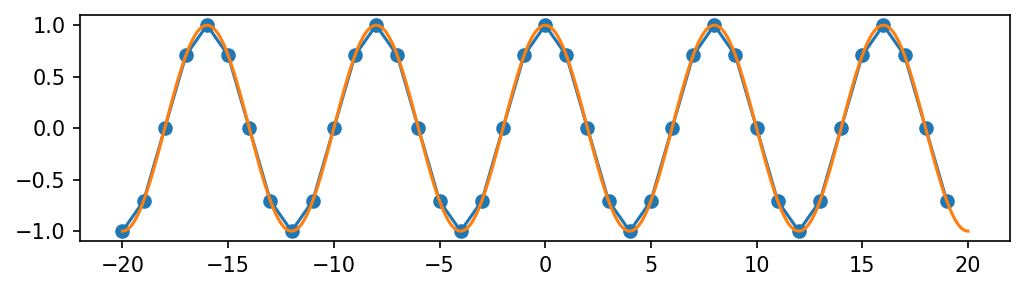

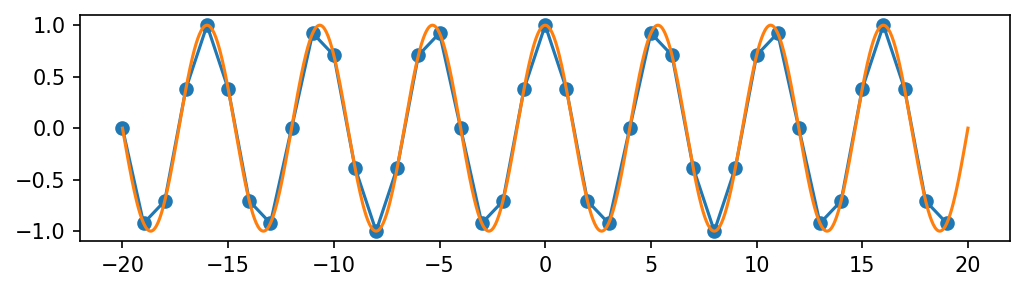

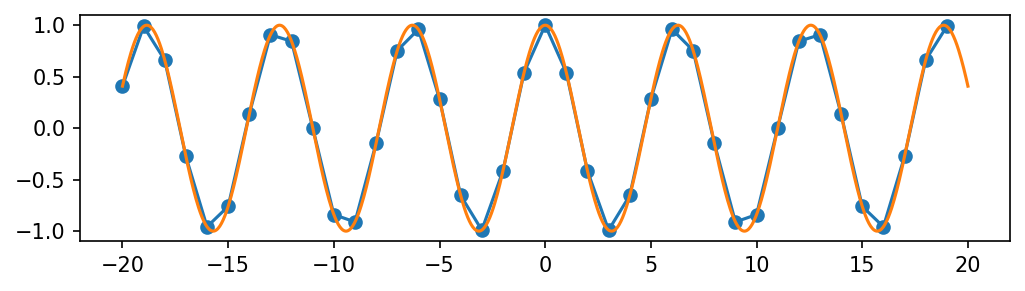

In [48]:
n = np.arange(-20, 20)
t = np.linspace(-20, 20, 1000)


plt.figure()
plt.plot(n, np.cos(np.pi/4*n), 'o-')
plt.plot(t, np.cos(np.pi/4*t), '-')
plt.show()

plt.figure()
plt.plot(n, np.cos(3*np.pi/8*n), 'o-')
plt.plot(t, np.cos(3*np.pi/8*t), '-')
plt.show()

plt.figure()
plt.plot(n, np.cos(1*n), 'o-')
plt.plot(t, np.cos(t), '-')
plt.show()

## Вопрос
Сколько всего синусоидальных сигналов типа $x[n]=cos(w_0n)$ c периодом N=4 отсчета?
$w_0 = 2\pi k/N$


.

.

.

.

.

.

.

.

.

.
.
.












$$w_0 = ~.., 0\cdot 2\pi/4, 1\cdot 2\pi/4, 2\cdot 2\pi/4, 3\cdot 2\pi/4, 4\cdot 2\pi/4, 5\cdot 2\pi/4, ..$$

$$w_0 = ~.., 0, \pi/2, \pi, 3\pi/2, 2\pi, 5\pi/2, ...$$

$$w_0 \in [0, \pi/2, \pi, 3\pi/2]$$

In [43]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 150



def f(w):
    plt.figure()
    n = np.arange(-4, 16+4)
    t = np.linspace(-4, 16+4, 1000)
    x = np.sin(w*np.pi*n)
    plt.plot(t, np.sin(w*np.pi*t))
    plt.plot(n, x, '.-', linewidth=0, color='k')
    if sum((x[:4]-x[4:8])**2)<1e-10:
        plt.plot(n[4:8], x[4:8], 'oC2')
        plt.plot(n[8:12], x[8:12], 'oC3')
    plt.ylim(-1.2, 1.2)
    [plt.axvline(v-0.5, color='k', linestyle='--', zorder=-1, alpha=0.4) for v in [0, 4, 8, 12, 16]]
    [plt.axvline(v, color='k', linestyle='-', zorder=-1, alpha=0.1) for v in n]
    plt.xlim(-1, 16)
    plt.legend(['$sin({:.1f}\pi n)$'.format(w)], loc=1)
    plt.show()
    
    

interactive_plot = interactive(f, w=(-1, 4, 0.1), )
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='w', max=4.0, min=-1.0), Output(layout=Layout(height=…

In [21]:
n = np.arange(16+1)
x = np.sin(2*np.pi*n)
x[:4]==x[4:8]

array([False, False, False, False])

In [22]:
x[:4]

array([ 0.00000000e+00, -2.44929360e-16, -4.89858720e-16, -7.34788079e-16])